## Real Estate Price Prediction Machine Learning

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('boston.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288950,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704273,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'PRICE'}>, <Axes: >, <Axes: >]],
      dtype=object)

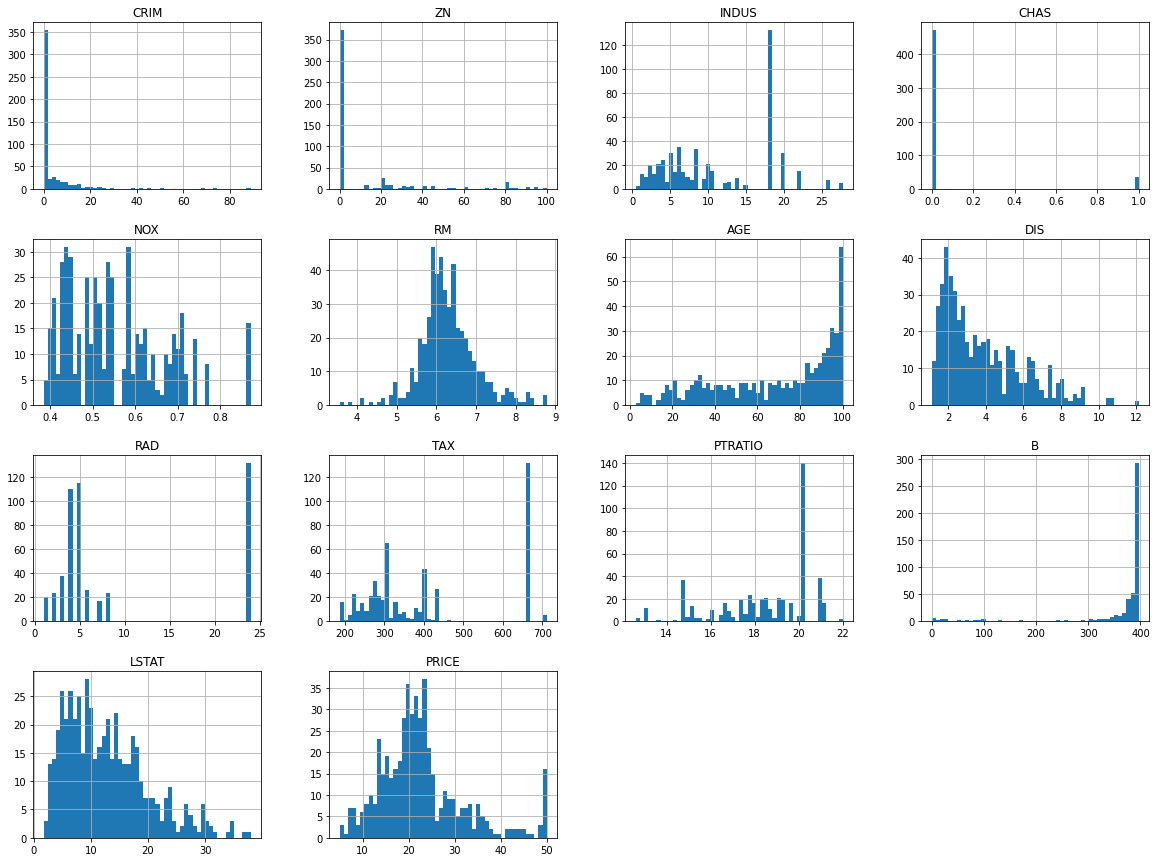

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=99)

In [10]:
print(len(train_set))
print(len(test_set))

404
102


## Straitisfied Shuffle Split
Categorical Data is Spread Equally

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=99)
for train_index, test_index in split.split(housing,housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing=strat_train_set.copy()

## Correlations

In [15]:
corr_matrix=housing.corr()

Correlation of MEDV means on changing MEDV what will be the affect on  other variables ,Correlation of one is strong positive correlation

In [16]:
corr_matrix['PRICE'].sort_values(ascending=False)

PRICE      1.000000
RM         0.668153
B          0.337999
ZN         0.331064
DIS        0.240087
CHAS       0.152771
AGE       -0.351553
CRIM      -0.371595
RAD       -0.387950
NOX       -0.420229
TAX       -0.467448
INDUS     -0.473099
PTRATIO   -0.504197
LSTAT     -0.722877
Name: PRICE, dtype: float64

array([[<Axes: xlabel='PRICE', ylabel='PRICE'>,
        <Axes: xlabel='RM', ylabel='PRICE'>,
        <Axes: xlabel='ZN', ylabel='PRICE'>,
        <Axes: xlabel='LSTAT', ylabel='PRICE'>],
       [<Axes: xlabel='PRICE', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='PRICE', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='PRICE', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

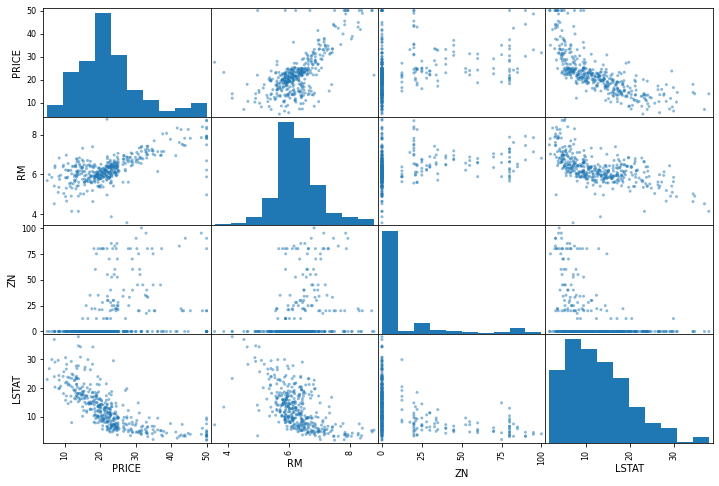

In [17]:
from pandas.plotting import scatter_matrix
attributes=["PRICE","RM","ZN","LSTAT"]  
scatter_matrix(housing[attributes],figsize=(12,8))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='RM', ylabel='PRICE'>

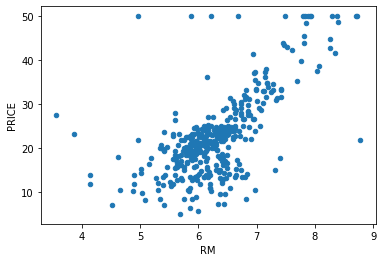

In [18]:
housing.plot(kind="scatter",x="RM",y="PRICE")

We can observe the outliers in the above plot , we make Correlation Matrix and scatter plot so that we can identify anomalies such as Outliers


## Different Attributes Combination

In [19]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TAXRM
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4,75.060117
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,51.605312
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6,107.679871
158,1.34284,0.0,19.58,0,0.605,6.066,100.0,1.7573,5,403,14.7,353.89,6.43,24.3,66.435872
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6,50.520567


In [21]:
corr_matrix=housing.corr()
corr_matrix['PRICE'].sort_values()

LSTAT     -0.722877
TAXRM     -0.532179
PTRATIO   -0.504197
INDUS     -0.473099
TAX       -0.467448
NOX       -0.420229
RAD       -0.387950
CRIM      -0.371595
AGE       -0.351553
CHAS       0.152771
DIS        0.240087
ZN         0.331064
B          0.337999
RM         0.668153
PRICE      1.000000
Name: PRICE, dtype: float64

Hence TAXRM becomes a new attribute

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='TAXRM', ylabel='PRICE'>

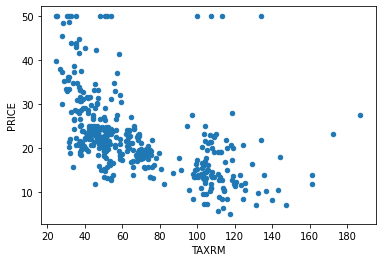

In [22]:
housing.plot(kind="scatter",x="TAXRM",y="PRICE")

In [23]:
housing=strat_train_set.drop("PRICE",axis=1)
housing_labels=strat_train_set["PRICE"].copy()

## Missing Attributes

In [24]:
# Filling Median
median=housing['RM'].median()
housing['RM'].fillna(median)

133    5.822
13     5.949
478    6.185
158    6.066
174    5.859
       ...  
320    6.426
346    5.898
311    6.122
46     5.786
207    5.783
Name: RM, Length: 404, dtype: float64

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

Imputer fills null values in the dataset

In [26]:
imputer.statistics_

array([2.74475e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20200e+00, 7.82000e+01, 3.07930e+00, 5.00000e+00, 3.34500e+02,
       1.91000e+01, 3.91475e+02, 1.13950e+01])

In [27]:
X=imputer.transform(housing)

In [28]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [29]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.732486,11.387376,11.251213,0.069307,0.556797,6.287002,69.050248,3.776259,9.648515,411.564356,18.455446,353.302153,12.711411
std,8.969874,23.865557,6.870666,0.254290,0.115302,0.717957,28.226696,2.139246,8.792069,168.969445,2.179500,95.185325,7.098648
min,0.010960,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.077820,0.000000,5.190000,0.000000,0.453000,5.886500,45.625000,2.085850,4.000000,279.000000,17.375000,372.387500,6.987500
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.202000,78.200000,3.079300,5.000000,334.500000,19.100000,391.475000,11.395000
75%,3.716458,3.125000,18.100000,0.000000,0.624000,6.621500,94.100000,5.218725,24.000000,666.000000,20.200000,396.210000,17.152500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit Learn Design

Primarily Three Type of Objects


1.  Estimators - Example Imputer
2.   Transformers`-fit transform
3. Predictors- Regression and other algorithms



# Feature Scaling


*   Normalization-MinMaxScaler
*   Standardization-StandardScaler



#Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [31]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [32]:
housing_num_tr

array([[-0.37981419, -0.47773851,  1.550356  , ...,  1.26082039,
         0.37223936,  0.32702903],
       [-0.34633413, -0.47773851, -0.45338698, ...,  1.16894242,
         0.4585991 , -0.62785622],
       [ 0.7256037 , -0.47773851,  0.99805157, ...,  0.80143056,
         0.27767492,  0.75016873],
       ...,
       [-0.32840197, -0.47773851, -0.19690788, ..., -0.02547112,
         0.4585991 , -0.94944239],
       [-0.39560431, -0.47773851, -0.6326309 , ..., -0.25516603,
         0.4585991 ,  0.20290805],
       [-0.38850177, -0.47773851, -0.09635641, ...,  0.06640685,
         0.38002331,  0.75440012]])

Model Selection

In [45]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [46]:
some_data=housing.iloc[:5]


In [47]:
some_labels=housing_labels.iloc[:5]

In [48]:
prepared_data=my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([18.409, 20.56 , 14.845, 25.195, 22.094])

In [50]:
list(some_labels)

[18.4, 20.4, 14.6, 24.3, 22.6]

In [51]:
import numpy as np


In [52]:
from sklearn.metrics  import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [53]:
mse
# Overfitting


1.3485700915841587

## Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [55]:
rmse_scores

array([2.90644511, 4.06304686, 1.86628358, 5.76567375, 4.22044038,
       3.18446345, 3.00418692, 3.03948951, 2.61096873, 2.22921981])

In [58]:
def print_scores(scores):
  print("Scores",scores)
  print("Mean",scores.mean())
  print("Standard deviation: ",scores.std())

In [59]:
print_scores(rmse_scores)

Scores [2.90644511 4.06304686 1.86628358 5.76567375 4.22044038 3.18446345
 3.00418692 3.03948951 2.61096873 2.22921981]
Mean 3.2890218101944177
Standard deviation:  1.0727662917427951


## Saving the Model

In [60]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [61]:
X_test=strat_test_set.drop("PRICE",axis=1)
Y_test=strat_test_set['PRICE'].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)

In [62]:
final_rmse

2.835579736346073

In [66]:
print(list(final_prediction))

[22.272000000000013, 9.865000000000004, 20.067000000000004, 19.468999999999998, 14.011999999999999, 31.56599999999998, 32.843999999999994, 8.009, 31.39599999999998, 22.557000000000002, 21.901000000000018, 19.504000000000005, 20.92700000000001, 9.892999999999994, 44.25700000000002, 23.138, 15.019999999999987, 20.472000000000012, 14.925999999999997, 18.660999999999998, 9.275, 22.425000000000004, 21.529, 22.120999999999995, 21.253000000000007, 19.873000000000005, 17.884999999999998, 21.158, 20.472999999999992, 20.81200000000001, 31.473999999999993, 33.822000000000024, 21.699999999999996, 42.72300000000003, 24.193, 19.102999999999987, 22.82500000000001, 25.530000000000022, 33.379, 33.24200000000002, 21.092, 19.581999999999997, 33.28499999999999, 33.42399999999999, 26.43699999999998, 15.638999999999992, 26.302000000000003, 28.643, 20.46100000000001, 34.897000000000006, 47.42699999999999, 23.583999999999996, 15.377, 6.841000000000004, 27.49899999999999, 33.41499999999999, 13.813999999999997,

In [67]:
print(list(Y_test))

[20.8, 7.2, 19.3, 18.7, 15.2, 35.1, 29.6, 8.5, 32.0, 23.2, 21.7, 14.5, 19.6, 7.5, 46.0, 21.4, 14.0, 20.1, 13.6, 19.4, 8.8, 23.1, 20.3, 20.4, 20.1, 17.5, 20.1, 20.5, 21.5, 18.9, 23.6, 35.4, 18.9, 46.7, 28.1, 20.5, 29.8, 29.6, 36.5, 34.9, 20.6, 19.5, 36.1, 36.0, 24.0, 19.4, 26.2, 23.7, 19.9, 36.4, 50.0, 22.3, 12.6, 5.0, 28.6, 33.2, 15.1, 50.0, 32.4, 48.3, 14.1, 25.0, 18.4, 19.8, 11.8, 21.5, 17.8, 17.3, 14.6, 25.2, 24.5, 20.0, 19.2, 29.8, 7.4, 23.3, 21.0, 17.4, 23.8, 29.4, 18.5, 16.5, 32.2, 17.5, 22.9, 16.7, 20.6, 16.1, 8.4, 8.7, 16.6, 32.5, 20.7, 18.2, 19.6, 28.4, 28.4, 14.3, 22.2, 30.1, 21.1, 23.4]
